# Cleaning raw scraped data

Open raw scraped data from `.csv` and clean it.

Imports.

In [260]:
import math
from itertools import combinations

import matplotlib.pyplot as plt
import pandas as pd

Pathing to the data.

In [261]:
data_path = '../data'
raw_data_path = f'{data_path}/csv/raw'
clean_data_path = f'{data_path}/csv/clean'

Open scraped data.

In [262]:
matches_df = pd.read_csv(f'{raw_data_path}/bundesliga_matches.csv')

See the shape of the scraped data - rows and columns.

In [263]:
matches_df.shape

(4425, 239)

## Standardise column names

See all column names of the scraped data.

In [264]:
matches_df.columns.tolist()

['Date',
 'Time',
 'Comp',
 'Round',
 'Day',
 'Venue',
 'Result',
 'GF',
 'GA',
 'Opponent',
 'xG',
 'xGA',
 'Poss',
 'Attendance',
 'Captain',
 'Formation',
 'Referee',
 'Match Report',
 'Notes',
 'Team',
 'shooting  Comp',
 'shooting  Round',
 'shooting  Day',
 'shooting  Venue',
 'shooting  Result',
 'shooting  GF',
 'shooting  GA',
 'shooting  Opponent',
 'shooting Standard Gls',
 'shooting Standard Sh',
 'shooting Standard SoT',
 'shooting Standard SoT%',
 'shooting Standard G/Sh',
 'shooting Standard G/SoT',
 'shooting Standard Dist',
 'shooting Standard FK',
 'shooting Standard PK',
 'shooting Standard PKatt',
 'shooting Expected xG',
 'shooting Expected npxG',
 'shooting Expected npxG/Sh',
 'shooting Expected G-xG',
 'shooting Expected np:G-xG',
 'shooting Unnamed: 25_level_0 Match Report',
 'keeper  Comp',
 'keeper  Round',
 'keeper  Day',
 'keeper  Venue',
 'keeper  Result',
 'keeper  GF',
 'keeper  GA',
 'keeper  Opponent',
 'keeper Performance SoTA',
 'keeper Performance GA

There are numerous issues with the column names:
- Columns that have double spaces in their names. Replace them with single spaces.
- Columns do not follow a consistent naming convention. Convert all column names to lowercase.
- Columns that have spaces in their names. Replace them with underscores.
- There are numerous columns from each category where there is `_unnamed_<some number>_level_0`. Remove the `_unnamed_<some number>_level_0` from the column names.

In [265]:
matches_df.columns = matches_df.columns.str.replace('  ', ' ')
matches_df.columns = matches_df.columns.str.lower()
matches_df.columns = matches_df.columns.str.replace(' ', '_')
matches_df.columns = matches_df.columns.str.replace(r'(.*)_unnamed:_\d+_level_0_(.*)', r'\1_\2', regex=True)
matches_df.columns.tolist()

['date',
 'time',
 'comp',
 'round',
 'day',
 'venue',
 'result',
 'gf',
 'ga',
 'opponent',
 'xg',
 'xga',
 'poss',
 'attendance',
 'captain',
 'formation',
 'referee',
 'match_report',
 'notes',
 'team',
 'shooting_comp',
 'shooting_round',
 'shooting_day',
 'shooting_venue',
 'shooting_result',
 'shooting_gf',
 'shooting_ga',
 'shooting_opponent',
 'shooting_standard_gls',
 'shooting_standard_sh',
 'shooting_standard_sot',
 'shooting_standard_sot%',
 'shooting_standard_g/sh',
 'shooting_standard_g/sot',
 'shooting_standard_dist',
 'shooting_standard_fk',
 'shooting_standard_pk',
 'shooting_standard_pkatt',
 'shooting_expected_xg',
 'shooting_expected_npxg',
 'shooting_expected_npxg/sh',
 'shooting_expected_g-xg',
 'shooting_expected_np:g-xg',
 'shooting_match_report',
 'keeper_comp',
 'keeper_round',
 'keeper_day',
 'keeper_venue',
 'keeper_result',
 'keeper_gf',
 'keeper_ga',
 'keeper_opponent',
 'keeper_performance_sota',
 'keeper_performance_ga',
 'keeper_performance_saves',
 'ke

## Drop columns

Display data types.

In [266]:
matches_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 239 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    date                            4425 non-null   object 
 1    time                            4425 non-null   object 
 2    comp                            4425 non-null   object 
 3    round                           4425 non-null   object 
 4    day                             4425 non-null   object 
 5    venue                           4425 non-null   object 
 6    result                          4425 non-null   object 
 7    gf                              4425 non-null   object 
 8    ga                              4425 non-null   object 
 9    opponent                        4425 non-null   object 
 10   xg                              4039 non-null   float64
 11   xga                             4039 non-null   float64
 12   poss              

At first sight, the data types seem favorable. However, there is a big amount of `object`(`string`) data.

Explore first and last five entries.

In [267]:
matches_df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,misc_performance_int,misc_performance_tklw,misc_performance_pkwon,misc_performance_pkcon,misc_performance_og,misc_performance_recov,misc_aerial_duels_won,misc_aerial_duels_lost,misc_aerial_duels_won%,misc_match_report
0,2020-09-12,15:30,DFB-Pokal,First round,Sat,Away,W,2,1,1860 Munich,...,7.0,8.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Match Report
1,2020-09-19,15:30,Bundesliga,Matchweek 1,Sat,Home,D,1,1,Arminia,...,11.0,12.0,0.0,0.0,0.0,63.0,17.0,15.0,53.1,Match Report
2,2020-09-25,20:30,Bundesliga,Matchweek 2,Fri,Away,W,3,1,Hertha BSC,...,8.0,12.0,1.0,0.0,1.0,57.0,23.0,12.0,65.7,Match Report
3,2020-10-03,15:30,Bundesliga,Matchweek 3,Sat,Home,W,2,1,Hoffenheim,...,7.0,6.0,0.0,0.0,0.0,56.0,24.0,9.0,72.7,Match Report
4,2020-10-18,15:30,Bundesliga,Matchweek 4,Sun,Away,D,1,1,Köln,...,7.0,10.0,1.0,0.0,0.0,65.0,36.0,32.0,52.9,Match Report


In [268]:
matches_df.tail()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,misc_performance_int,misc_performance_tklw,misc_performance_pkwon,misc_performance_pkcon,misc_performance_og,misc_performance_recov,misc_aerial_duels_won,misc_aerial_duels_lost,misc_aerial_duels_won%,misc_match_report
4420,2022-04-16,18:30,Bundesliga,Matchweek 30,Sat,Away,W,3,1,M'Gladbach,...,12.0,12.0,0.0,0.0,0.0,63.0,16.0,14.0,53.3,Match Report
4421,2022-04-23,15:30,Bundesliga,Matchweek 31,Sat,Home,W,3,1,Arminia,...,6.0,12.0,0.0,0.0,1.0,63.0,20.0,18.0,52.6,Match Report
4422,2022-04-30,15:30,Bundesliga,Matchweek 32,Sat,Away,W,4,1,Augsburg,...,9.0,16.0,1.0,0.0,0.0,54.0,15.0,21.0,41.7,Match Report
4423,2022-05-07,15:30,Bundesliga,Matchweek 33,Sat,Home,L,0,1,Wolfsburg,...,11.0,9.0,0.0,0.0,0.0,57.0,18.0,25.0,41.9,Match Report
4424,2022-05-14,15:30,Bundesliga,Matchweek 34,Sat,Away,L,1,2,Stuttgart,...,2.0,14.0,0.0,1.0,0.0,52.0,7.0,24.0,22.6,Match Report


Drop the `notes` and `match_report` columns as they do not provide any useful information.

In [269]:
matches_df.drop(['notes', 'match_report'], axis=1, inplace=True)

Find duplicate columns.

The following code was borrowed from [https://stackoverflow.com/a/58002867/9553927](https://stackoverflow.com/a/58002867/9553927).

In [270]:
def get_list_of_equal_cols(dataframe):
    return[(i, j) for i,j in combinations(dataframe, 2) if dataframe[i].equals(dataframe[j])]

In [271]:
get_list_of_equal_cols(matches_df)

[('comp', 'shooting_comp'),
 ('comp', 'keeper_comp'),
 ('comp', 'passing_comp'),
 ('comp', 'passing_types_comp'),
 ('comp', 'gca_comp'),
 ('comp', 'defense_comp'),
 ('comp', 'possession_comp'),
 ('comp', 'misc_comp'),
 ('round', 'shooting_round'),
 ('round', 'keeper_round'),
 ('round', 'passing_round'),
 ('round', 'passing_types_round'),
 ('round', 'gca_round'),
 ('round', 'defense_round'),
 ('round', 'possession_round'),
 ('round', 'misc_round'),
 ('day', 'shooting_day'),
 ('day', 'keeper_day'),
 ('day', 'passing_day'),
 ('day', 'passing_types_day'),
 ('day', 'gca_day'),
 ('day', 'defense_day'),
 ('day', 'possession_day'),
 ('day', 'misc_day'),
 ('venue', 'shooting_venue'),
 ('venue', 'keeper_venue'),
 ('venue', 'passing_venue'),
 ('venue', 'passing_types_venue'),
 ('venue', 'gca_venue'),
 ('venue', 'defense_venue'),
 ('venue', 'possession_venue'),
 ('venue', 'misc_venue'),
 ('result', 'shooting_result'),
 ('result', 'keeper_result'),
 ('result', 'passing_result'),
 ('result', 'passin

`comp`, `round`, `day`, `venue`, `result`, `opponent`, `match_report`, `gf` and `ga` have a lot of duplicates.

Drop all duplicate columns.

In [272]:
regex_of_columns_to_remove = '.+_(comp|round|day|venue|result|opponent|match_report|gf|ga)'
matches_df.drop(matches_df.filter(regex=regex_of_columns_to_remove).columns, axis=1, inplace=True)

In [273]:
remaining_equal_cols = get_list_of_equal_cols(matches_df)
remaining_equal_cols

[('xg', 'shooting_expected_xg'),
 ('poss', 'possession_poss'),
 ('passing_total_cmp', 'passing_types_outcomes_cmp'),
 ('passing_total_att', 'passing_types_att'),
 ('passing_types_pass_types_crs', 'misc_performance_crs'),
 ('defense_tackles_tklw', 'misc_performance_tklw'),
 ('defense_int', 'misc_performance_int')]

Pick the second item (column) from each tuple and drop it from the dataframe.

In [274]:
cols_to_drop = [item[1] for item in remaining_equal_cols]
matches_df.drop(cols_to_drop, axis=1, inplace=True)

See data types again.

In [275]:
matches_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 157 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    date                            4425 non-null   object 
 1    time                            4425 non-null   object 
 2    comp                            4425 non-null   object 
 3    round                           4425 non-null   object 
 4    day                             4425 non-null   object 
 5    venue                           4425 non-null   object 
 6    result                          4425 non-null   object 
 7    gf                              4425 non-null   object 
 8    ga                              4425 non-null   object 
 9    opponent                        4425 non-null   object 
 10   xg                              4039 non-null   float64
 11   xga                             4039 non-null   float64
 12   poss              

## Convert data types

Out of the 14 `object(string)` dtype columns, `gf` and `ga` are supposed to be numeric(`float` or `int`).

Check the unique values of `gf`.

In [276]:
matches_df['gf'].unique().tolist()

['2',
 '1',
 '3',
 '0',
 '5',
 '4',
 '6',
 '1 (6)',
 '3 (5)',
 '2 (4)',
 '0.0',
 '1.0',
 '3.0',
 '8.0',
 '2.0',
 '4.0',
 '7',
 '1 (3)',
 '8',
 '2 (3)',
 '3 (2)',
 '2 (5)',
 '1 (5)',
 '4 (5)',
 '1 (2)',
 '1 (4)',
 '11',
 '2 (8)',
 '2 (6)',
 '2 (0)',
 '3 (3)',
 '3 (4)',
 '9',
 '12']

Show matches where `gf` was `2 (5)`.

In [277]:
matches_df[matches_df['gf'] == '2 (5)']

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,misc_performance_fls,misc_performance_fld,misc_performance_off,misc_performance_pkwon,misc_performance_pkcon,misc_performance_og,misc_performance_recov,misc_aerial_duels_won,misc_aerial_duels_lost,misc_aerial_duels_won%
1213,2017-08-05,20:30,DFL-Supercup,DFL-Supercup,Sat,Away,D,2 (5),2 (4),Dortmund,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2317,2021-01-13,20:45,DFB-Pokal,Second round,Wed,Away,D,2 (5),2 (6),Holstein Kiel,...,14.0,17.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3231,2018-08-20,18:30,DFB-Pokal,First round,Mon,Away,D,2 (5),2 (3),Energie Cottbus,...,19.0,16.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4261,2021-10-27,18:30,DFB-Pokal,Round of 32,Wed,Home,D,2 (5),2 (4),Augsburg,...,13.0,15.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Upon looking on the Internet, it seems that the number in the parentheses is goals scored in the penalty shootout.

Move the penalty shootout goals to new columns - `pgf` and `pga`. And visualize 5 matches with those new columns.

In [278]:
matches_df['pgf'] = matches_df['gf'].str.extract(r'\((\d+)\)')
matches_df['pga'] = matches_df['ga'].str.extract(r'\((\d+)\)')
matches_df[matches_df['pgf'].notnull()][['date', 'team', 'team', 'opponent', 'pgf', 'pga']].head()

,date,team,team,opponent,pgf,pga
212,2020-03-03,Dusseldorf,Dusseldorf,Saarbrücken,6,7
296,2023-02-23,Bayer Leverkusen,Bayer Leverkusen,fr Monaco,5,3
316,2017-08-05,Dortmund,Dortmund,Bayern Munich,4,5
874,2019-05-09,Eintracht Frankfurt,Eintracht Frankfurt,eng Chelsea,3,4
964,2022-07-30,Koln,Koln,Jahn R'burg,3,4


Plot amount of matches with penalty shootout goals.

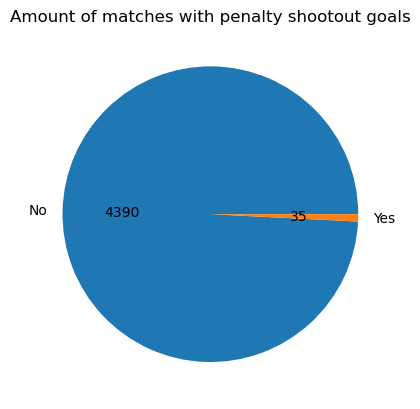

In [279]:
pgf_counts = matches_df['pgf'].isnull().value_counts()
pgf_counts.plot(
    kind='pie',
    labels=['No', 'Yes'],
    title='Amount of matches with penalty shootout goals',
    autopct=lambda p: '{:.0f}'.format(p * pgf_counts.sum() / 100)
)
plt.ylabel('')
plt.show()

Since the number of goals is always a whole number, get the number before the dot. Finally, convert both `gf` and `ga` to `int`.

In [280]:
matches_df['gf'] = matches_df['gf'].str.split(' ').str[0]
matches_df['gf'] = matches_df['gf'].str.split('.').str[0]
matches_df['gf'] = matches_df['gf'].astype('int')

matches_df['ga'] = matches_df['ga'].str.split(' ').str[0]
matches_df['ga'] = matches_df['ga'].str.split('.').str[0]
matches_df['ga'] = matches_df['ga'].astype('int')

## Check for missing values

Add column that shows the amount of missing values in each row.

In [281]:
temp_df = matches_df.copy()
temp_df.insert(loc=0, column='NaNs', value=temp_df.isnull().sum(axis=1))

Plot the amount of missing values in each row.

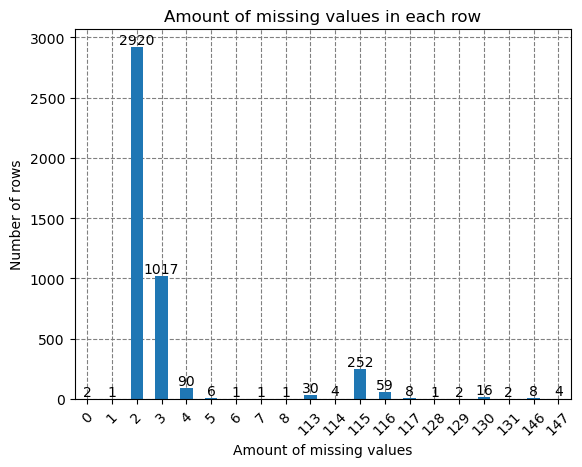

In [282]:
nans_counts = temp_df['NaNs'].value_counts()
nans_counts_plot = nans_counts.sort_index().plot(
    kind='bar',
    title='Amount of missing values in each row',
    xlabel='Amount of missing values',
    ylabel='Number of rows',
    rot=45
)
nans_counts_plot.set_axisbelow(True)
nans_counts_plot.grid(color='gray', linestyle='dashed')
nans_counts_plot.bar_label(nans_counts_plot.containers[0])
plt.show()

Majority of the rows have 2-4 missing values. Two of those missing values can be attributed to the penalties column that was created earlier. However, there is still a substantial amount of rows with more than 112 missing values:

In [283]:
print(f'{nans_counts[nans_counts.index > 112].sum()} rows with lots of missing values')

386 rows with lots of missing values


Remove rows with missing values.

In [284]:
matches_df = matches_df[matches_df.isnull().sum(axis=1) <= 112]

## Look at basic statistics

Show basic statistics.

In [285]:
matches_df.describe()

,gf,ga,xg,xga,poss,attendance,shooting_standard_gls,shooting_standard_sh,shooting_standard_sot,shooting_standard_sot%,...,misc_performance_fls,misc_performance_fld,misc_performance_off,misc_performance_pkwon,misc_performance_pkcon,misc_performance_og,misc_performance_recov,misc_aerial_duels_won,misc_aerial_duels_lost,misc_aerial_duels_won%
count,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,3234.000000,4039.000000,4039.000000,4039.000000,4038.000000,...,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000
mean,1.561525,1.525378,1.489354,1.456078,50.314682,38100.675325,1.519931,12.884625,4.468433,34.686726,...,12.389205,11.610547,1.995048,0.114385,0.154246,0.038376,54.479327,16.865066,16.834613,50.023595
std,1.354871,1.334121,0.852480,0.836276,11.158335,19756.580762,1.336995,5.160577,2.547893,15.337924,...,3.906097,3.808777,1.634047,0.334996,0.385120,0.194687,10.226509,6.948823,6.925692,10.242490
min,0.000000,0.000000,0.000000,0.000000,17.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.900000,0.800000,42.000000,24101.250000,1.000000,9.000000,3.000000,25.000000,...,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,48.000000,12.000000,12.000000,43.300000
50%,1.000000,1.000000,1.300000,1.300000,50.000000,34700.000000,1.000000,12.000000,4.000000,33.300000,...,12.000000,11.000000,2.000000,0.000000,0.000000,0.000000,55.000000,16.000000,16.000000,50.000000
75%,2.000000,2.000000,2.000000,1.900000,58.000000,50300.000000,2.000000,16.000000,6.000000,44.400000,...,15.000000,14.000000,3.000000,0.000000,0.000000,0.000000,61.000000,21.000000,21.000000,57.100000
max,8.000000,8.000000,5.600000,5.600000,83.000000,90071.000000,8.000000,35.000000,20.000000,100.000000,...,28.000000,28.000000,10.000000,3.000000,3.000000,2.000000,93.000000,49.000000,49.000000,100.000000


See statistics about `object(string)` columns.

In [286]:
matches_df.describe(include=object)

,date,time,comp,round,day,venue,result,opponent,captain,formation,referee,team,pgf,pga
count,4039,4039,4039,4039,4039,4039,4039,4039,4039,4039,4039,4039,3,3
unique,799,25,4,41,7,3,3,107,178,20,144,27,2,2
top,2020-06-20,15:30,Bundesliga,Group stage,Sat,Home,W,Leverkusen,Manuel Neuer,4-2-3-1,Felix Brych,Bayern Munich,5,4
freq,18,2222,3680,243,2241,2015,1554,206,174,1080,208,264,2,2


A big portion of the matches are played in the `Bundesliga` but there are other competitions in the dataset.

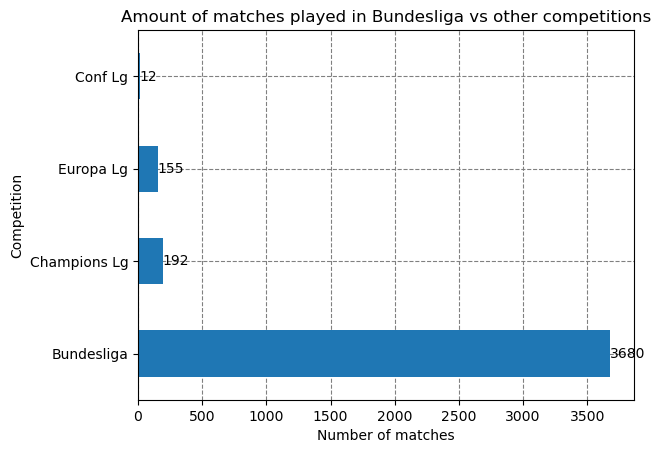

In [287]:
comp_counts = matches_df['comp'].value_counts()
ax = comp_counts.plot(
    kind='barh',
    title='Amount of matches played in Bundesliga vs other competitions',
    xlabel='Number of matches',
    ylabel='Competition'
)
ax.bar_label(ax.containers[0])
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.show()

Since this project is focused on the Bundesliga, drop all other competitions.

In [288]:
matches_df = matches_df[matches_df['comp'] == 'Bundesliga']

`venue` shows 3 unique values. `Home` and `Away` are obvious but check the third value. Also, visualize the amount of matches played depending on the venue.

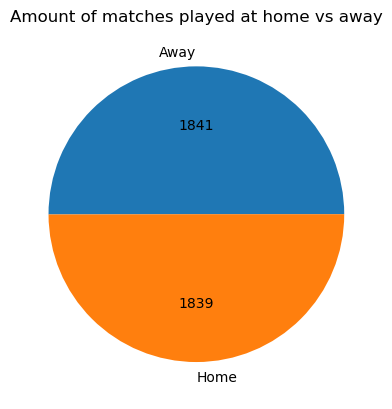

In [289]:
venue_counts = matches_df['venue'].value_counts()
venue_counts.plot(
    kind='pie',
    title='Amount of matches played at home vs away',
    autopct=lambda p: '{:.0f}'.format(p * venue_counts.sum() / 100)
)
plt.ylabel('')
plt.show()

The third type of venue is `Neutral`. Though it is not a big portion of the matches. Apart from that, the dataset is evenly split between `Home` and `Away` matches.

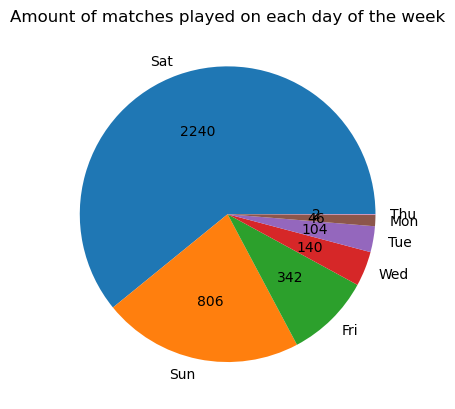

In [290]:
day_counts = matches_df['day'].value_counts()
day_counts.plot(
    kind='pie',
    title='Amount of matches played on each day of the week',
    autopct=lambda p: '{:.0f}'.format(p * day_counts.sum() / 100)
)
plt.ylabel('')
plt.show()

## Reexplore data

See the shape of the data - rows and columns.

In [291]:
matches_df.shape

(3680, 159)

The dataset is still big enough to work with. ~800 matches got dropped.

In [292]:
matches_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 1 to 4424
Data columns (total 159 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    date                            3680 non-null   object 
 1    time                            3680 non-null   object 
 2    comp                            3680 non-null   object 
 3    round                           3680 non-null   object 
 4    day                             3680 non-null   object 
 5    venue                           3680 non-null   object 
 6    result                          3680 non-null   object 
 7    gf                              3680 non-null   int64  
 8    ga                              3680 non-null   int64  
 9    opponent                        3680 non-null   object 
 10   xg                              3680 non-null   float64
 11   xga                             3680 non-null   float64
 12   poss              

`opponent` and `team` are columns that are supposed to have the same values. Check if that is the case.

In [293]:
teams = matches_df['team'].unique().tolist()
opponents = matches_df['opponent'].unique().tolist()
teams.sort()
opponents.sort()

print(f'{len(teams)} teams')
print(teams)

print(f'{len(opponents)} opponents')
print(opponents)

27 teams
['Arminia', 'Augsburg', 'Bayer Leverkusen', 'Bayern Munich', 'Bochum', 'Darmstadt 98', 'Dortmund', 'Dusseldorf', 'Eintracht Frankfurt', 'Freiburg', 'Greuther Furth', 'Hamburger SV', 'Hannover 96', 'Heidenheim', 'Hertha BSC', 'Hoffenheim', 'Koln', 'Mainz 05', 'Monchengladbach', 'Nurnberg', 'Paderborn 07', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Union Berlin', 'Werder Bremen', 'Wolfsburg']
25 opponents
['Arminia', 'Augsburg', 'Bayern Munich', 'Bochum', 'Dortmund', 'Düsseldorf', 'Eint Frankfurt', 'Freiburg', 'Greuther Fürth', 'Hamburger SV', 'Hannover 96', 'Hertha BSC', 'Hoffenheim', 'Köln', 'Leverkusen', "M'Gladbach", 'Mainz 05', 'Nürnberg', 'Paderborn 07', 'RB Leipzig', 'Schalke 04', 'Stuttgart', 'Union Berlin', 'Werder Bremen', 'Wolfsburg']


Normalize values.

In [294]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {
    'Düsseldorf': 'Dusseldorf',
    'Eint Frankfurt': 'Eintracht Frankfurt',
    'Greuther Fürth': 'Greuther Furth',
    'Köln': 'Koln',
    'M\'Gladbach': 'Monchengladbach',
    'Nürnberg': 'Nurnberg',
    'Leverkusen': 'Bayer Leverkusen',
}

mapping = MissingDict(**map_values)
matches_df['opponent'] = matches_df['opponent'].map(mapping)

Show differences between `team` and `opponent` unique values.

In [295]:
teams = matches_df['team'].unique().tolist()
opponents = matches_df['opponent'].unique().tolist()
teams.sort()
opponents.sort()

print(set(teams) - set(opponents))

{'Heidenheim', 'Darmstadt 98'}


Both `Darmstadt 98` and `Heidenheim` are making a return in the Bundesliga so this difference is not a mistake.

## Plot data

Show amount of matches played by each team.

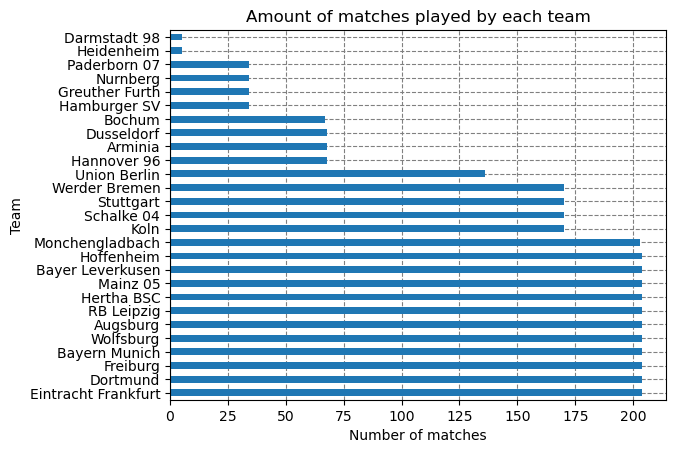

In [296]:
ax = matches_df['team'].value_counts().plot(
    kind='barh',
    title='Amount of matches played by each team',
    xlabel='Number of matches',
    ylabel='Team',
)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.show()

The data shows that more than half of teams have played more than 100 matches.

Each team plays on average 34 matches in a season. If we divide the matches played, we can plot how many seasons out of the 6 scraped seasons each team has played.

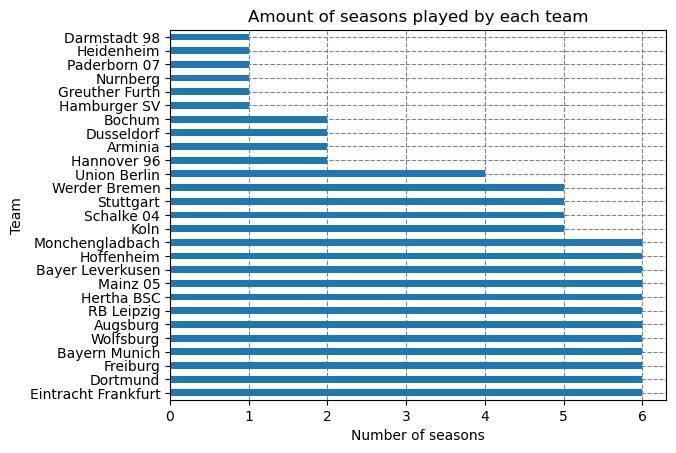

In [297]:
seasons_per_team = matches_df['team'].value_counts().div(34).apply(lambda x: math.ceil(x))
ax = seasons_per_team.plot(
    kind='barh',
    title='Amount of seasons played by each team',
    xlabel='Number of seasons',
    ylabel='Team'
)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.show()

See scored goals per game for each team.

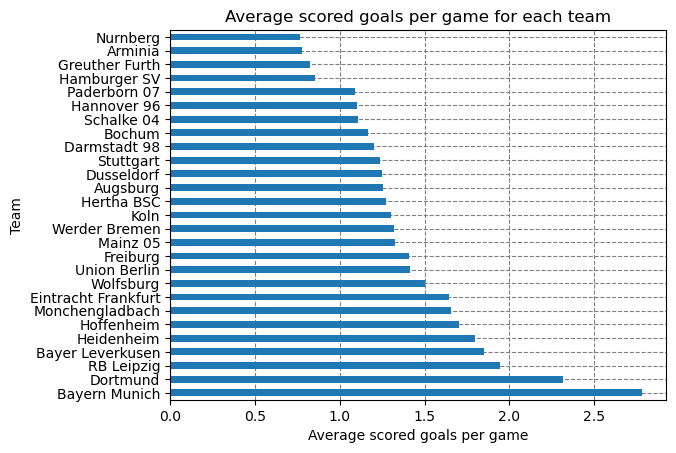

In [298]:
scored_goals_per_game = matches_df.groupby('team')['gf'].mean().sort_values(ascending=False)
ax = scored_goals_per_game.plot(
    kind='barh',
    title='Average scored goals per game for each team',
    xlabel='Average scored goals per game',
    ylabel='Team'
)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.show()

Bayern Munich is an outlier with an average of close to 3 scored goals per game. However, nearly all teams have an average of 1+ goals per game. This can be beneficial for a betting strategy where we bet on `Over 0.5` goals.

Show average scored and conceded goals per game for each team.

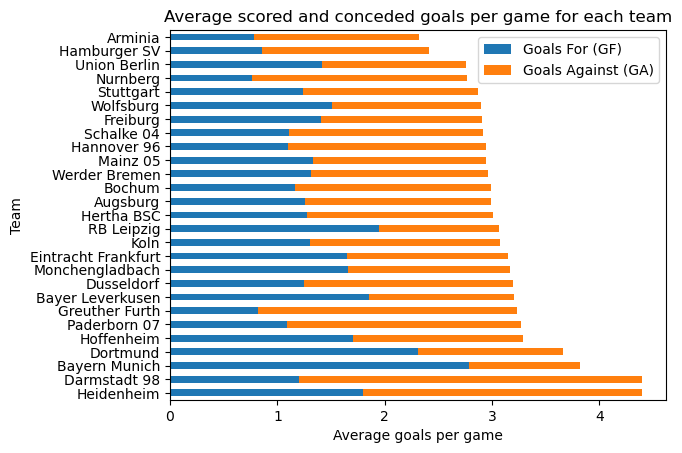

In [299]:
sum_goals_per_team = matches_df.groupby('team')[['gf', 'ga']].mean()
sum_goals_per_team['total_goals'] = sum_goals_per_team['gf'] + sum_goals_per_team['ga']
sorted_teams = sum_goals_per_team.sort_values(by='total_goals', ascending=False)

ax = sorted_teams[['gf', 'ga']].plot.barh(
    stacked=True,
    title='Average scored and conceded goals per game for each team',
    xlabel='Average goals per game',
    ylabel='Team',
)
ax.legend(['Goals For (GF)', 'Goals Against (GA)'])
plt.show()

Another interesting observation is that **all teams** on average play games with more than 2 goals. This can be beneficial for a betting strategy where we bet on `Over 1.5` goals.

Compare amount of matches with <2 goals and ones with >=2 goals.

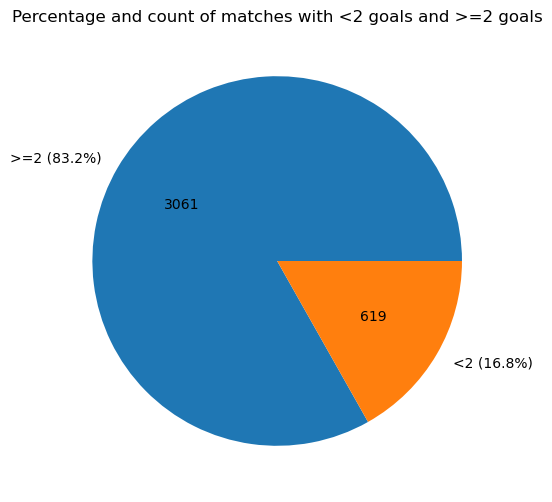

In [304]:
temp_df = matches_df.copy()
temp_df['total_goals'] = temp_df['gf'] + temp_df['ga']
temp_df['total_goals'] = temp_df['total_goals'].apply(lambda x: '>=2' if x >= 2 else '<2')

value_counts = temp_df['total_goals'].value_counts()
total_matches = len(temp_df)
percentages = (value_counts / total_matches) * 100
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(value_counts.index, percentages)]

plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=labels, autopct=lambda p: '{:.0f}'.format(p * value_counts.sum() / 100))
plt.title('Percentage and count of matches with <2 goals and >=2 goals')
plt.show()

A remarkable 83% of matches have 2+ goals. This can be beneficial for a betting strategy where we bet on `Over 1.5` goals.

Plot amount of matches where both teams have scored and where only one team has scored.

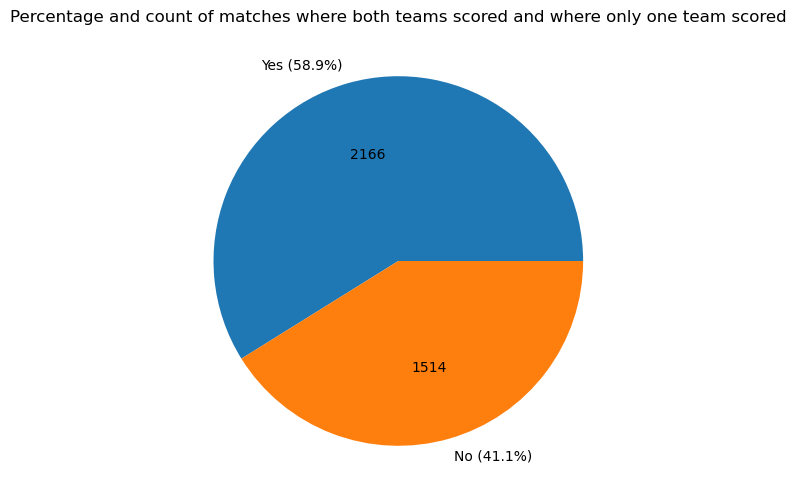

In [306]:
temp_df = matches_df.copy()
temp_df['both_teams_scored'] = temp_df['gf'].apply(lambda x: 1 if x > 0 else 0) + temp_df['ga'].apply(lambda x: 1 if x > 0 else 0)
temp_df['both_teams_scored'] = temp_df['both_teams_scored'].apply(lambda x: 'Yes' if x == 2 else 'No')

value_counts = temp_df['both_teams_scored'].value_counts()
total_matches = len(temp_df)
percentages = (value_counts / total_matches) * 100
labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(value_counts.index, percentages)]

plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=labels, autopct=lambda p: '{:.0f}'.format(p * value_counts.sum() / 100))
plt.title('Percentage and count of matches where both teams scored and where only one team scored')
plt.show()

Only 59% of matches have both teams scoring. Randomly betting on `Both Teams To Score` would not be profitable.

Show correlation between attendance and scored goals in a match(sum of gf and ga)

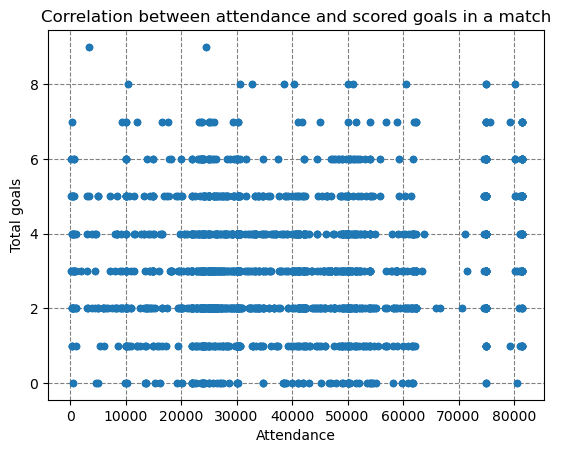

In [310]:
temp_df = matches_df.copy()
temp_df['total_goals'] = temp_df['gf'] + temp_df['ga']
ax = temp_df.plot.scatter(x='attendance', y='total_goals', title='Correlation between attendance and scored goals in a match')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.xlabel('Attendance')
plt.ylabel('Total goals')
plt.show()

No correlation is observed between attendance and scored goals in a match.

## Save the data

In [301]:
matches_df.to_csv(f'{clean_data_path}/bundesliga_matches.csv', index=False)